# Ground State Chemical Potential and Energy in 2 Dimensions

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

##

t = 1

def I_1(x):
    if np.abs(x) <= 2*t:
        result = np.heaviside(x + 2*t, 1) - (1 / np.pi) * np.arccos(x / (2*t))
    else:
        result = np.heaviside(x + 2*t, 1)
    return result
    
def rho_1d(mu, U):
    if U >= 0:
        return I_1(mu) + I_1(mu - U)
    elif U < 0:
        return 2 * I_1(mu - U/2)
    
def one_plot(x_array, y_array,x_label, y_label):
    plt.figure(dpi=100)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.show()
    

    

### Replicate Results for 1D, New $\mu$ Plot

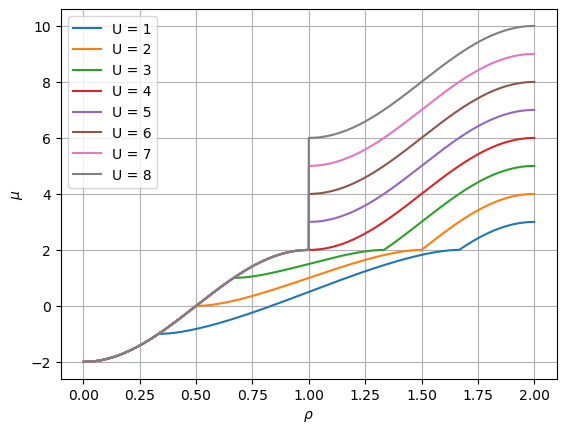

In [18]:
U_values = [1,2,3,4,5,6,7,8]
rho_arrays = []
mu_arrays = []

for U_i in U_values:
    mu_array = np.linspace(-2, 2*t + U_i, 1000, endpoint=True)
    rho_array = []
    for mu_i in mu_array:
        rho_array.append(rho_1d(mu_i, U_i))
    rho_arrays.append(rho_array)
    # Normalize the mu arrays
#    mu_array /= (2*t + U_i)
    mu_arrays.append(mu_array)
    
def many_plots(U_array, x_arrays, y_arrays, xlabel, ylabel):
    plt.figure(dpi=100)
    # Plot erstellen
    for i in range(len(x_arrays)):
        plt.plot(x_arrays[i], y_arrays[i], linestyle='-', label=f'U = {U_array[i]}')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()

many_plots(U_values, rho_arrays, mu_arrays, r'$\rho$', r'$\mu$')

### 2D Calculations

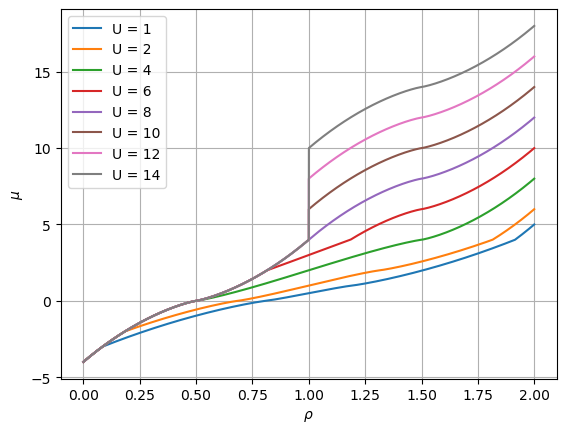

In [28]:
d = 2

def I_2(x):
    def I_1_shifted(k):
        return I_1(x + 2*t*np.cos(k))
    
    integral_value = integrate.quad(I_1_shifted, -np.pi, np.pi)
    
    return integral_value[0] / (2*np.pi)

def rho_2d(mu, U):
    if U >= 0:
        return I_2(mu) + I_2(mu - U)
    elif U < 0:
        return 2 * I_2(mu - U/2)
 
U_values_2d = [1,2,4,6,8,10,12,14]
rho_arrays_2d = []
mu_arrays_2d = []

for U_i in U_values_2d:
    mu_array = np.linspace(-2*d, 2*t*d + U_i, 1000, endpoint=True)
    rho_array = []
    for mu_i in mu_array:
        rho_array.append(rho_2d(mu_i, U_i))
    rho_arrays_2d.append(rho_array)
    # Normalize the mu arrays
#    mu_array /= (2*t + U_i)
    mu_arrays_2d.append(mu_array)
    
many_plots(U_values_2d, rho_arrays_2d, mu_arrays_2d, r'$\rho$', r'$\mu$')